# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [ ]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

** Read in the csv file as a dataframe called df **

In [ ]:
df=pd.read_csv("911.csv")

** Check the info() of the df **

In [ ]:
df.info()

** Check the head of df **

In [ ]:
df.head(3)

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [ ]:
df.zip.value_counts().nlargest(5)
# Can also use head(5)

** What are the top 5 townships (twp) for 911 calls? **

In [ ]:
df.twp.value_counts().nlargest(5)

** Take a look at the 'title' column, how many unique title codes are there? **

In [ ]:
df.title.nunique()

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [ ]:
df["Reasons/Departments"]=df.title.apply(lambda x:x.split(":")).str[0]
df["Reasons/Departments"]

** What is the most common Reason for a 911 call based off of this new column? **

In [ ]:
df["Reasons/Departments"].value_counts()

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [ ]:
sb.set_style("whitegrid")
sb.countplot(x='Reasons/Departments', data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
from pandas.api.types import is_string_dtype
is_string_dtype(df['timeStamp'])

In [ ]:
time=df['timeStamp']
type(time[1])

In [ ]:
df.timeStamp.apply(lambda x:type(x)).value_counts()

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [ ]:
df['tStamp']=pd.to_datetime(df.timeStamp)

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [ ]:
time=df['tStamp'].iloc[0]
#df['tStamp'].dt.weekday
dir(time)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['weekday']=df['tStamp'].dt.weekday
days=df.weekday.map(dmap)
days.value_counts()

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [ ]:
graph=sb.countplot(x=days,data=df, hue='Reasons/Departments', saturation=1)


**Now do the same for Month:**

In [ ]:
df['month']=df['tStamp'].dt.month
df['tStamp'].dt.month.value_counts()

In [ ]:
sb.countplot(x=df.month,data=df, hue='Reasons/Departments', saturation=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [329]:
bymonth=df.groupby(df.month).count()
bymonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,tStamp,weekday,Date,Hours,Day of Week
month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


In [ ]:
df.groupby(month).zip.count()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

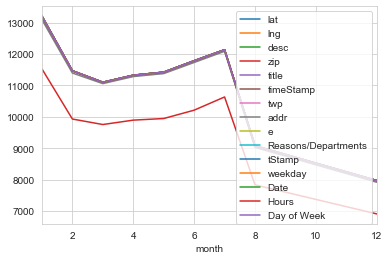

In [330]:
df.groupby(df.month).count().plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [ ]:
df.set_index('month')
g = sb.lmplot(x=str(df.month), y=str(df.twp), data=df)

In [ ]:
sb.lmplot(x="month", y="twp", data=bymonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [ ]:
df['Date']=df['tStamp'].dt.date

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
df.weekday.value_counts()

In [ ]:
df.groupby('Date').weekday.count().plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [ ]:
df[df["Reasons/Departments"]=='EMS'].Date.value_counts().plot()
plt.title('EMS')
plt.xlabel('Date')

In [ ]:
df[df["Reasons/Departments"]=='Traffic'].Date.value_counts().plot()
plt.title('Traffic')
plt.xlabel('Date')

In [ ]:
df[df["Reasons/Departments"]=='Fire'].Date.value_counts().plot()
plt.title('Fire')
plt.xlabel('Date')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
df['Hours']=df.tStamp.dt.hour
df['Hours'].value_counts()
df['Day of Week']=days

In [ ]:
df2=df.groupby('Day of Week').Hours.value_counts()
df2=df2.unstack(level=1).head(5)

** Now create a HeatMap using this new DataFrame. **

In [ ]:
sb.heatmap(df2)

** Now create a clustermap using this DataFrame. **

In [ ]:
sb.clustermap(df2)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
df3=df.groupby('Day of Week').month.value_counts()
df3=df3.unstack(level=1).head(5)
df3

In [ ]:
sb.heatmap(df3)

In [ ]:
sb.clustermap(df3)

**Continue exploring the Data however you see fit!**
# Great Job!